## Erdős–Rényi random graph model

In the `G(n,p)` model, a graph is constructed by connecting labeled nodes randomly. Each edge is included in the graph with probability `p`, independently from every other edge.
Equivalently, the probability for generating each graph that has n nodes and M edges is

image.png

Possible ER graph for n=5, p=0.2:  
(number of possible edges: nC2=10)

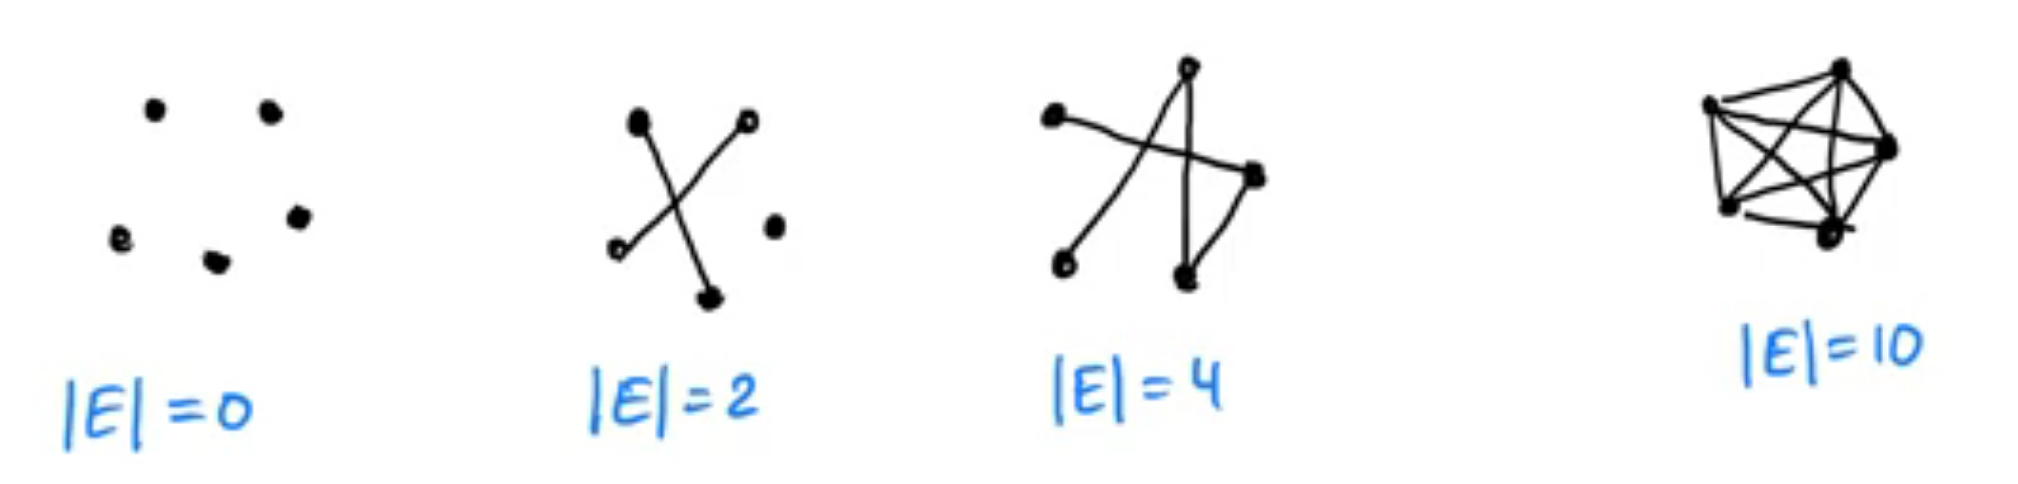

The distribution of the degree of any particular vertex is binomial:


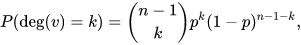

fraction of nodew with degree k = (select k nodes out of n-1 neighbors) * prob(k edges) * prob(non edges)

avg degree k_avg = p*(n-1)

This distribution is Poisson for large n and np = const.

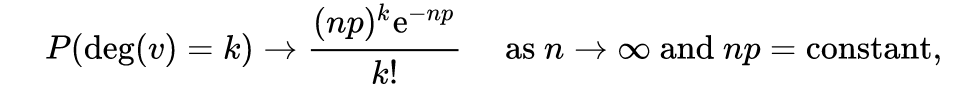

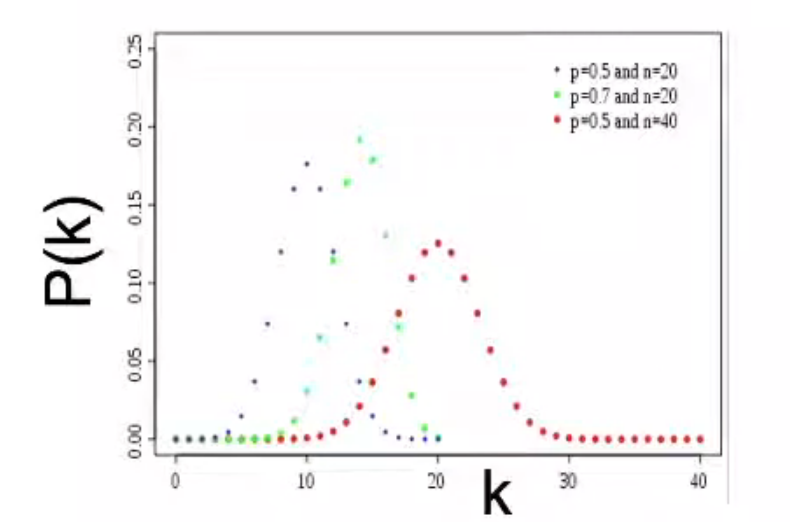

Text(0, 0.5, 'P(k)')

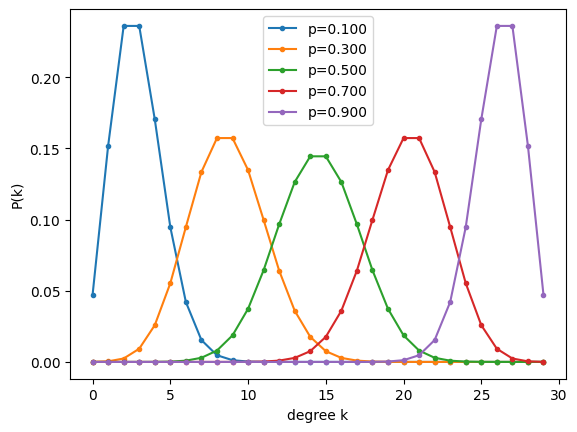

In [11]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

def degree_prob(n, k, p):
    p = scipy.special.comb(n-1, k) * p**k * (1-p)**(n-1-k)
    return p

n = 30
p = np.linspace(0.1, 0.9, 5)
k = np.arange(n)

for i in p:
    out_list = []
    for j in k:
        out_prob = degree_prob(n, j, i)
        out_list.append(out_prob)
    plt.plot(k, out_list, marker='.', label=f'p={i:.3f}')
plt.legend(loc='best')
plt.xlabel('degree k')
plt.ylabel('P(k)')

**Limitations**

The ER graphs do not have two important properties observed in many real-world networks:
1. Because they have a constant, random, and independent probability of two nodes being connected, ER graphs have a **low clustering coefficient** *(measure of the degree to which nodes in a graph tend to cluster together)*.
2. They do **not** account for the **formation of hubs**, which is often observed in real-world networks. Hubs are highly connected nodes that play a critical role in many networks. Real-world networks often follow a scale-free distribution, where a few nodes (hubs) have a significantly higher degree than the majority of nodes.

## Watts–Strogatz model

The Watts-Strogatz model addressed the first limitation while the Barabasi-Albert Model and the Configuration Model addressed the second one.

1. The WS model starts with a regular lattice structure, which is essentially a ring or a one-dimensional grid of nodes. In this lattice, each node is initially connected to its `k` nearest neighbors.
2. The defining feature of the Watts-Strogatz model is the introduction of randomness through a **rewiring process**. Rewire each edge in the ring. When an edge is rewired (with probability `p`), it is removed from its current position and randomly reconnected to any other node in the network, including the possibility of connecting to itself (forming a loop).
3. Small-world networks produced by WS model exhibit short average path lengths between nodes, which means that most nodes can be reached from any other node through a relatively small number of steps. This small-world property is achieved through the rewiring process, which introduces long-range connections while preserving the overall regular structure.

**Algo:**  
Start with a ring-lattice then randomly pick some links to rewire.
- start with high clustering but with high diameter
- as rewire enough links, get low diameter
- don't rewire too many links, keep high clustering

The degree distribution in the case of the ring lattice is just a Dirac delta function.

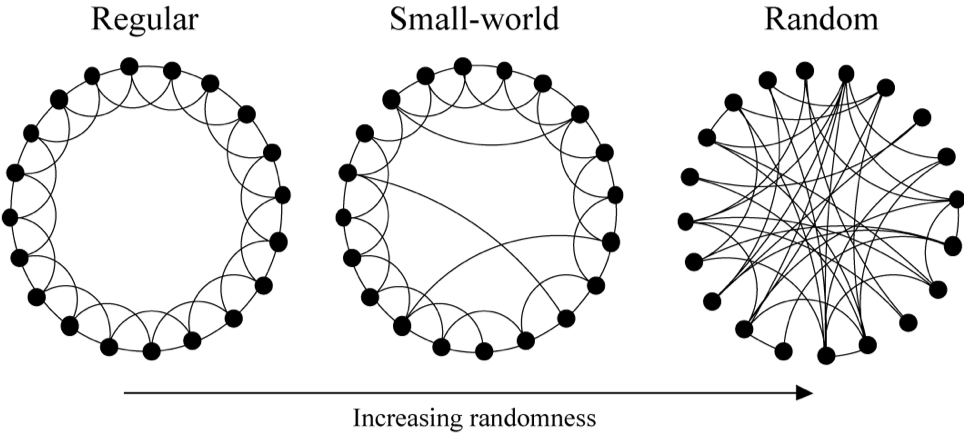

## Barabási–Albert (BA) model

* The major limitation of the WS model is that it produces an unrealistic degree distribution.
* In contrast, **real networks are often scale-free networks** inhomogeneous in degree, having hubs and a scale-free degree distribution. Such networks are better described in that respect by the preferential attachment family of models, such as the Barabási–Albert (BA) model.

A scale-free network is a network whose degree distribution follows a **power law**, at least asymptotically.

* **Growth:** nodes are added to network over time
* **Preferential attachment:** these nodes prefer to link to highly-connected nodes

For exampe, twitter network degree distribution (ideally should be a straight line).

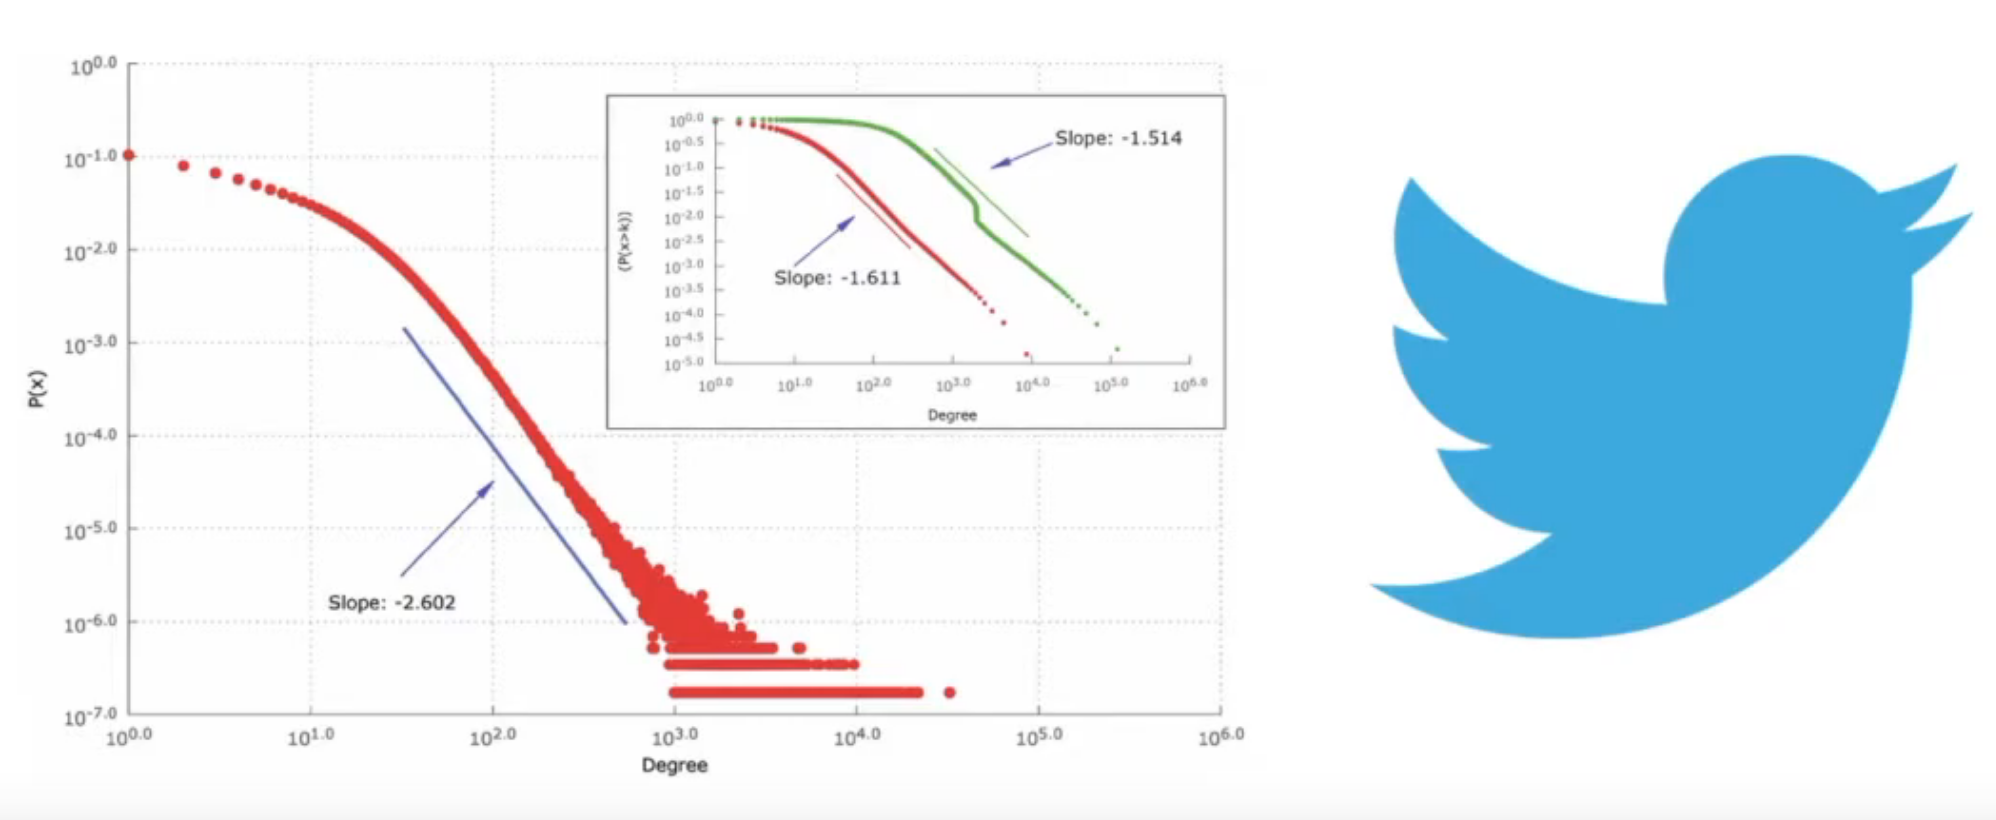

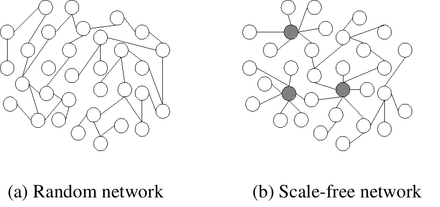

The Barabási–Albert (BA) model is an algorithm for **generating random scale-free networks using a preferential attachment** mechanism.

1. Start with a small network.
2. Repeat
  1. Place a new node next to the network.
  2. Draw a fixed number m links to existing nodes, with probability of linking to the node proportional to that node's degree.

The degree distribution resulting from the BA model is scale free, in particular, it is a power law of the form

$P(k) \approx k^{-3}$

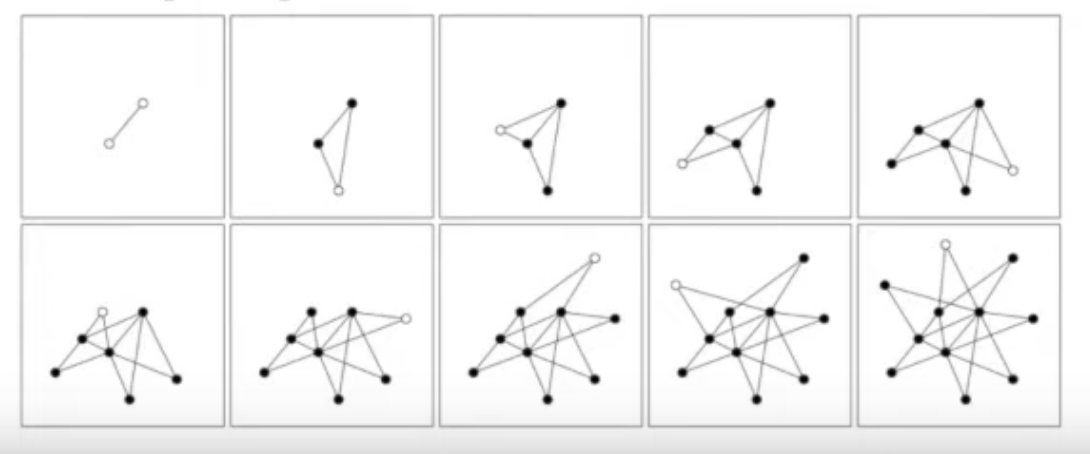

**Limitations:**

* Nodes introduced first in the network have more connections, which is not true in real-world e.g. people with most followers on twitter aren't necessarily those who created twitter account first.
* The BA model fails to produce the high levels of clustering seen in real networks, a shortcoming not shared by the Watts and Strogatz model. Thus, neither the WS model nor the BA model should be viewed as fully realistic.

In [43]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def graph_gen(n):
    """
    n: Number of nodes
    """

    # Erdos-Renyi Graph
    p = 0.2  # Probability of edge creation
    er_graph = nx.erdos_renyi_graph(n, p)

    # Watts-Strogatz Graph
    k = 4   # Each node is connected to k nearest neighbors
    p = 0.2  # Probability of rewiring each edge
    ws_graph = nx.watts_strogatz_graph(n, k, p)

    # Random Regular Graph: generated with a fixed degree for each node
    d = 4   # Degree of each node
    rr_graph = nx.random_regular_graph(d, n)

    # Barabasi-Albert Graph
    m = 3   # Number of edges to attach from a new node to existing nodes
    ba_graph = nx.barabasi_albert_graph(n, m)

    for g in [er_graph, ws_graph, rr_graph, ba_graph]:
        print('no of edges: ', g.number_of_edges())
        print('degree: ', [j for _, j in g.degree()])

    # Plot the graphs
    plt.figure(figsize=(12, 3))

    plt.subplot(141)
    nx.draw(er_graph, with_labels=True, node_color='skyblue', node_size=300)
    plt.title("Erdos-Renyi Graph")

    plt.subplot(142)
    nx.draw(ws_graph, with_labels=True, node_color='lightgreen', node_size=300)
    plt.title("Watts-Strogatz Graph")

    plt.subplot(143)
    nx.draw(rr_graph, with_labels=True, node_color='lightcoral', node_size=300)
    plt.title("Random Regular Graph")

    plt.subplot(144)
    nx.draw(ba_graph, with_labels=True, node_color='lightyellow', node_size=300)
    plt.title("Barabasi-Albert Graph")

    plt.tight_layout()
    plt.show()

    for g, l in zip([er_graph, ws_graph, rr_graph, ba_graph], ['ER', 'WS', 'RR', 'BA']):
        plt.plot(np.sort([j for _, j in g.degree()])[::-1], marker='.', label=l)
    plt.legend()

no of edges:  37
degree:  [2, 3, 4, 2, 4, 5, 5, 4, 1, 4, 5, 5, 2, 4, 4, 3, 6, 4, 4, 3]
no of edges:  40
degree:  [3, 5, 4, 4, 3, 4, 4, 3, 6, 3, 5, 4, 3, 4, 6, 4, 5, 4, 3, 3]
no of edges:  40
degree:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
no of edges:  51
degree:  [8, 13, 9, 7, 8, 5, 4, 3, 5, 4, 6, 3, 3, 3, 3, 5, 3, 4, 3, 3]


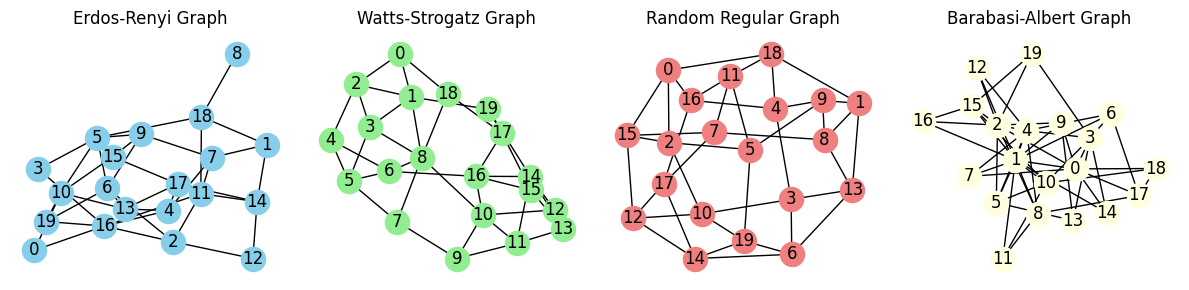

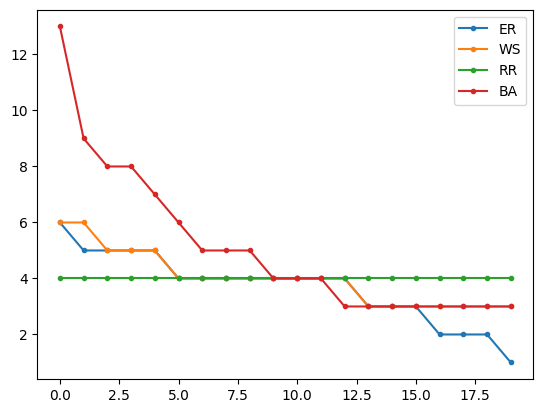

In [39]:
graph_gen(n=20)

no of edges:  244
degree:  [13, 9, 9, 11, 7, 11, 10, 13, 9, 7, 8, 12, 12, 14, 7, 10, 11, 8, 9, 14, 9, 13, 10, 14, 13, 8, 5, 7, 6, 6, 12, 10, 6, 12, 12, 8, 7, 13, 8, 14, 14, 12, 11, 11, 8, 6, 7, 9, 7, 6]
no of edges:  100
degree:  [3, 4, 4, 4, 4, 5, 3, 5, 4, 3, 4, 4, 3, 5, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 5, 5, 3, 5, 2, 5, 4, 5, 5, 4, 4, 5, 3, 4, 4, 3, 4, 4]
no of edges:  100
degree:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
no of edges:  141
degree:  [15, 3, 21, 12, 9, 15, 12, 8, 9, 11, 8, 8, 9, 6, 6, 3, 4, 5, 8, 3, 5, 5, 5, 4, 5, 4, 3, 3, 3, 3, 5, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3]


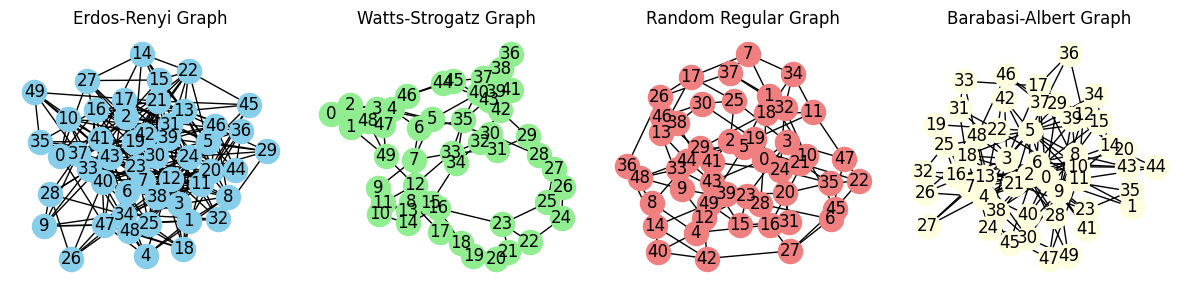

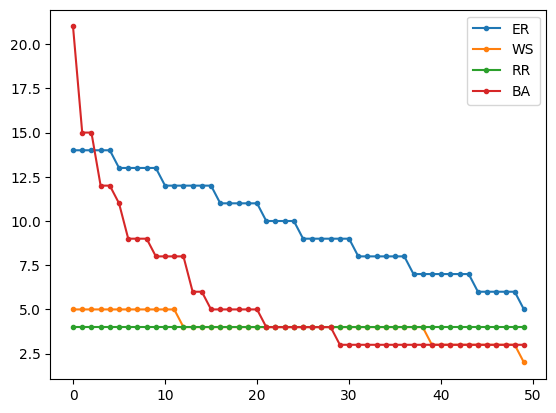

In [44]:
graph_gen(n=50)

no of edges:  3970
degree:  [37, 41, 42, 41, 30, 47, 37, 40, 38, 33, 41, 43, 34, 44, 42, 46, 33, 42, 33, 36, 43, 40, 45, 55, 40, 38, 41, 40, 34, 45, 35, 53, 41, 32, 44, 44, 36, 35, 40, 38, 36, 44, 45, 48, 40, 46, 42, 42, 35, 30, 31, 41, 33, 44, 44, 51, 32, 35, 31, 43, 31, 42, 39, 46, 37, 33, 46, 35, 36, 45, 44, 48, 43, 34, 39, 28, 32, 40, 44, 48, 39, 43, 42, 42, 47, 39, 36, 38, 40, 39, 41, 36, 59, 40, 42, 42, 31, 48, 42, 44, 32, 42, 42, 40, 35, 36, 35, 40, 38, 37, 52, 41, 33, 43, 32, 39, 48, 41, 33, 38, 31, 44, 41, 34, 33, 35, 37, 35, 38, 55, 34, 47, 38, 27, 30, 38, 41, 40, 40, 38, 50, 31, 41, 50, 44, 51, 36, 53, 38, 33, 34, 53, 28, 31, 41, 46, 43, 33, 39, 41, 43, 38, 38, 40, 36, 37, 46, 44, 35, 39, 43, 33, 42, 41, 42, 39, 46, 40, 49, 40, 34, 47, 43, 38, 33, 40, 40, 38, 22, 42, 46, 31, 46, 41, 30, 32, 29, 45, 47, 44]
no of edges:  400
degree:  [4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 2, 3, 3, 5, 5, 5, 5, 4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 5, 4, 3, 3, 4, 5, 5, 4, 6, 6, 4, 5, 4, 4, 3, 3, 2,

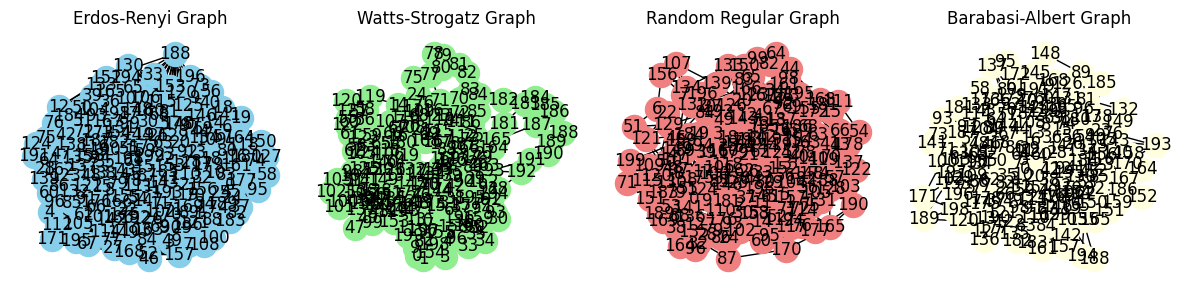

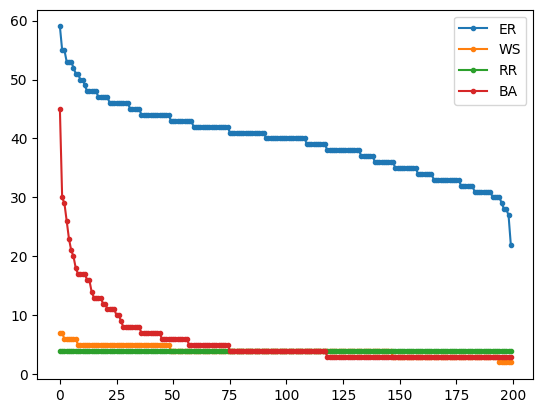

In [9]:
graph_gen(n=200)

References:

* https://networkx.org/documentation/stable/reference/generators.html
* https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model
* https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model
* https://www.youtube.com/watch?v=-zSc258EpoQ
* https://en.wikipedia.org/wiki/Scale-free_network
* https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model
* https://www.youtube.com/watch?v=qXXzB8sQuiE
* https://chih-ling-hsu.github.io/2020/05/15/Graph-Models